# MUDBENCS Gravity Core XRF Analysis

In May 2024, gravity cores from the WS23-139 expedition to French Guiana and Brazil were split and scanned for X-ray Fluorescence. These scans were made available prior to the core-splitting party traveling to Corvallis, OR, during the first week of June 2024. We use the following ratios for different scientific questions: 
|Element or Ratio   |Variable Constrained       |Source     |
|----------------   |--------------------       |------     |
|Ti/Ca              |Terrigenous influx         |[Gebregiorgis et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019GC008414) |
|Fe/Ca              |Terrigenous influx         |[Gebregiorgis et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019GC008414) |
|Br/Ca              |Marine to terrigenous OM   |[Seki et al., 2019](https://link.springer.com/article/10.1186/s40645-018-0244-z) |
|Zr/Rb              |Grain size                 |[Gebregiorgis et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019GC008414) |
|Mn/Ti              |RedOx                      |[Gebregiorgis et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019GC008414) |
|Mn/Ca              |RedOx                      |[Gebregiorgis et al., 2020](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2019GC008414) |

In [1]:
#Import packages and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MUDBENCS_calcs as MB
import os
import glob

directory = 'C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Seagoing Expeditions/CHEM-OCE Guianas Mudbanks 2020/Expedition prep/MUDBENCS/Coring Data/XRF_Data'

(((((((((((((((( MUDBENCS Date Analysis and Visualization Tools ))))))))))))))))


In [29]:
core = '18GC'

files = [f.name for f in os.scandir(directory) if os.path.isfile(os.path.join(directory, f))]

core_files = [f for f in files if core in f]

for n, file in enumerate(core_files):
    if n == 0:
        df = pd.read_excel(directory+'/'+file, skiprows=2)
        joint = []
        print('1st section loaded: ', file, df.shape)
    else:
        bottom = max(df['position (mm)'])
        joint.append(bottom)
        next_df = pd.read_excel(directory+'/'+file, skiprows=2)
        next_df['position (mm)'] = next_df['position (mm)'] + bottom
        df = pd.concat([df, next_df], ignore_index=True)
        print('2nd section concatenated: ', file, df.shape)

print(df.columns)

#Make ratios of interest
df['Ti/Ca'] = df['Ti']/df['Ca']
df['Fe/Ca'] = df['Fe']/df['Ca']
df['Zr/Rb'] = df['Zr']/df['Rb']
df['Mn/Ti'] = df['Mn']/df['Ti']
df['Mn/Ca'] = df['Mn']/df['Ca']
df['Br/Ca'] = df['Br']/df['Ca']
df['Br/Ti'] = df['Br']/df['Ti']
df['Fe/Si'] = df['Fe']/df['Si']

print(df.columns)

#Create directory string to save files:
dir_str = directory + '/Plots/' + core + '.svg'
print(dir_str)
    



1st section loaded:  WS23139-18GC-1A-xrfdata.xlsx (1355, 53)
2nd section concatenated:  WS23139-18GC-2A-xrfdata.xlsx (2286, 53)
Index(['filename', 'position (mm)', 'sample surface', 'validity', 'cps', 'MSE',
       'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe',
       'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'Y',
       'Zr', 'Nb', 'Tc', 'Rh', 'Pd', 'Ag', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
       'Hf', 'Re', 'Pt', 'Au', 'Tl', 'Pb', 'Bi', 'Po', 'Mo inc', 'Mo coh',
       'Dt'],
      dtype='object')
Index(['filename', 'position (mm)', 'sample surface', 'validity', 'cps', 'MSE',
       'Si', 'P', 'S', 'Cl', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe',
       'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Rb', 'Sr', 'Y',
       'Zr', 'Nb', 'Tc', 'Rh', 'Pd', 'Ag', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd',
       'Hf', 'Re', 'Pt', 'Au', 'Tl', 'Pb', 'Bi', 'Po', 'Mo inc', 'Mo coh',
       'Dt', 'Ti/Ca', 'Fe/Ca', 'Zr/Rb', 'Mn/Ti', 'Mn/Ca', 'Br/

[1496]
[<Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: > <Axes: >] Axes(0.125,0.125;0.0945122x0.755)


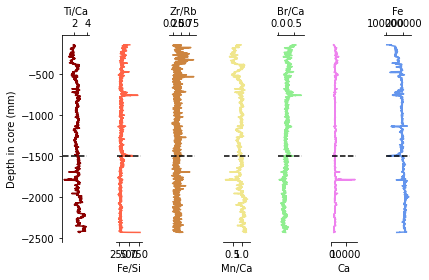

In [30]:
#Make some plots
variables = ['Ti/Ca', 'Fe/Si', 'Zr/Rb', 'Mn/Ca', 'Br/Ca', 'Ca', 'Fe']
colors = ['darkred', 'tomato', 'peru', 'khaki', 'lightgreen',  'violet', 'cornflowerblue']
print(joint)

fig, ax = plt.subplots(nrows=1, ncols=len(variables))
print(ax, ax[0])
for j, axes in enumerate(ax.flatten()):
    var = variables[j]
    #print('Plotting on', var, 'axes (', j, ')')
    axes.plot(df[var], -df['position (mm)'], color=colors[j])
    xlims = axes.get_xlim()
    #print('Adding joint line(s) to axes ', j)
    axes.hlines([-point for point in joint], xmin=min(xlims), xmax=max(xlims), colors='k', linestyle='dashed')
    axes.set(xlabel=var, ylabel='Depth in core (mm)')
    if j%2 == 0:
        #view x-axis on top for evens
        axes.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        axes.xaxis.set_label_position('top') 
        axes.spines['bottom'].set_visible(False)
    else:
        axes.spines['top'].set_visible(False)
    if j == 0:
        axes.spines['right'].set_visible(False)
    else:
        axes.spines['left'].set_visible(False)
        axes.spines['right'].set_visible(False)
        axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.savefig(dir_str)

In [43]:
3784*40

151360